# [Sequence to Sequence (seq2seq) Recurrent Neural Network (RNN) for Time Series Forecasting](https://github.com/guillaume-chevalier/seq2seq-signal-prediction)

***Note: You can find here the accompanying [seq2seq RNN forecasting presentation's slides](https://drive.google.com/drive/folders/1U0xQMxVespjQilMhYW4mDxN02IwEW67I), as well as the Google Colab file for running the present notebook (if you're not already in Colab).***

This is a series of exercises that you can try to solve to learn how to code Encoder-Decoder Sequence to Sequence Recurrent Neural Networks (seq2seq RNNs). You can solve different simple toy signal prediction problems. Seq2seq architectures may also be used for other sophisticated purposes, such as for Natural Language Processing (NLP). 

In this project are given 4 exercises of gradually increasing difficulty. I take for granted that you have at least some knowledge of how RNN works and how can they be shaped into an encoder and a decoder seq2seq setup of the most simple form (without attention). To learn more about RNNs in TensorFlow, you may want to visit [this other RNN project](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition) which I have built for that.

The current project is a series of example I have first built in French, but I haven't got the time to generate all the charts anew with proper English text. I have built this project at first for the practical part of the third hour of a [master class](https://webaquebec.org/classes-de-maitre/deep-learning-avec-tensorflow) conference I presented at the Web At Quebec (WAQ), originally in March 2017.

## How to use this ".ipynb" Python notebook ?

I made available an ".py" Python version of this tutorial within the [repository](https://github.com/guillaume-chevalier/seq2seq-signal-prediction), but it's more convenient to run the code inside the notebook or within Google Colab.

For running the notebook, you can run `jupyter-notebook` in the command-line to launch the web notebook IDE, and choose the `.ipynb` file. For Google Colab, if you want to run the code using GPU, make sure to do `Runtime > Change Runtime Type` and to select `GPU` for `Python 3`.

## Exercises

Note that the dataset changes in function of the exercice. Most of the time, you will have to edit the neural networks' training parameter to succeed in doing the exercise, but at a certain point, changes in the architecture itself will be asked and required. The datasets used for this exercises are found in [`datasets.py`](https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/datasets.py).

### Exercise 1

In theory, it is possible to create a perfect prediction of the signal for this exercise as it is deterministic. The neural network's parameters has been set to "somehow" acceptable values for a first training. You'll want to play with the hyperparameters until you reach predictions like those:

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E1.png?raw=true" />

Note: the neural network sees only what is to the left of the chart and is trained to predict what is at the right (predictions in yellow). 

We have 2 time series at once to predict, which are tied together. That means our neural network processes multidimensional data. A simple example would be to receive as an argument the past values of multiple stock market symbols in order to predict the future values of all those symbols with the neural network, which values are evolving together in time. That is what we will do in the exercise 4 with USD and EUR values of the BTC that we'll see both at once. 


### Exercise 2

Here, rather than 2 signals in parallel to predict, we have only one, for simplicity. HOWEVER, this signal is a superposition of two sine waves of varying wavelenght and offset (and restricted to a particular min and max limit of wavelengts). 

In order to finish this exercise properly, you will need to edit the neural network's hyperparameters. We would recommend first trying with hyperparameters like those:

- `n_samples = 125000`
- `epochs = 1`
- `batch_size = 50`
- `hidden_dim = 35`

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E2.png?raw=true" />

Here are predictions achieved with a bigger neural networks with 3 stacked recurrent cells and a width of 500 hidden units for each of those cells: 

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E2_2.png?raw=true" />

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E2_3.png?raw=true" />

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E2_3.png?raw=true" />

Note that it would be possible to obtain better results with a smaller neural network, provided better training hyperparameters and a longer training, adding dropout and a few things, and on. 

### Exercise 3

This exercise is similar to the previous one, except that the input data given to the encoder is noisy. The expected output is NOT noisy. This makes the task a bit harder. In this specific data context, we can call our neuralnetwork a denoising autoregressive autoencoder. Here is a good example of what a training example (and a prediction) could now looks like :

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E3.png?raw=true" />

Therefore the neural network is brought to denoise the signal to interpret its future smooth values. Here are some example of better predictions on this version of the dataset :

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E3_1.png?raw=true" />

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E3_2.png?raw=true" />

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E3_3.png?raw=true" />

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E3_4.png?raw=true" />

Similarly as I said for the exercise 2, it would be possible here too to obtain better results. Note that it would also have been possible to ask you to predict to reconstruct the denoised signal from the noisy input (rather than trying to predict the future values of it) as a denoising autoencoder. This type of architecture is also useful for data compression, such as manipulating images, for instance.

### Exercise 4

This exercise is much harder than the previous ones and is built more as an open-ended suggestion. It is to predict the future value of the Bitcoin's price. We have here some daily market data of the bitcoin's value, that is, BTC/USD and BTC/EUR. This is not enough to build a good predictor - at least having data precise at the minute level, or second level, would be more interesting. Here is a prediction that was made on the actual future values, the neural network has not been trained on the future values shown here so this is a legitimate prediction, given a well-enough model trained on the task: 

<img src="https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/images/E5.png?raw=true" />

Disclaimer: this prediction of the future values was really good and you should not expect predictions to be always that good using as few data as actually (side note: the other prediction charts in this project are all "average" except this one). I mostly didn't really took the time to compare this model to other financial models. For this exercise, you can try to plug more valuable financial data into the model in order to make more accurate predictions. Let me remind you that I provided the code for the datasets in [`datasets.py`](https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/datasets.py), but that could be replaced with more comprehensive data for predicting more accurately the Bitcoin. 

The input and output dimensions of the model is 2D accepts (BTC/USD and BTC/EUR). As an example, you could create additionnal input dimensions/streams which could contain meteo data and more financial data, such as the S&P 500, the Dow Jones, and so on. Other more creative input data could be sine waves (or other-type-shaped waves such as saw waves or triangles or two signals for `cos` and `sin`) representing the fluctuation of minutes, hours, days, weeks, months, years, moon cycles, and on (as we did in [Neuraxio's Time Series Solution](https://www.neuraxio.com/en/time-series-solution)). This could be combined with a stream of social media [sentiment analysis](https://github.com/Neuraxio/Sentiment-Analysis-AutoML) about the word "Bitcoin" to have another input signal which is more human-based and abstract. It is also interesting to know [where is the bitcoin most used](http://images.google.com/search?tbm=isch&q=bitcoin+heatmap+world).

With all the above-mentionned examples, it would be possible to have all of this as input features, at every time steps: (BTC/USD, BTC/EUR, Dow_Jones, SP_500, hour_of_day, day_of_week, day_of_month, week_of_year, year, moon_cycle, meteo_USA, meteo_EUROPE, social_sentiment). Finally, there could be those two output features, or more: (BTC/USD, BTC/EUR).

This prediction concept and similar time series forecasting algorithms can apply to many many things, such as auto-correcting machines for Industry 4.0, quality assurance in production chains, traffic forecast, meteo prediction, movements and action prediction, and lots of other types of shot-term and mid-term statistical predictions or forecasts.

## Install Requirements

In [0]:
!pip install tensorflow-gpu==2.1 neuraxle==0.3.1 neuraxle_tensorflow==0.1.0

In [0]:
import urllib

def download_import(filename):
    with open(filename, "wb") as f:
        # Downloading like that is needed because of Colab operating from a Google Drive folder that is just "shared with you".
        # https://drive.google.com/drive/folders/1U0xQMxVespjQilMhYW4mDxN02IwEW67I
        url = 'https://raw.githubusercontent.com/guillaume-chevalier/seq2seq-signal-prediction/master/{}'.format(filename)
        f.write(urllib.request.urlopen(url).read())

download_import("datasets.py")
download_import("plotting.py")
download_import("steps.py")

In [0]:
from typing import List
from logging import warning

import tensorflow as tf
from neuraxle.data_container import DataContainer
from neuraxle.hyperparams.space import HyperparameterSamples
from neuraxle.metaopt.random import ValidationSplitWrapper
from neuraxle.metrics import MetricsWrapper
from neuraxle.pipeline import Pipeline, MiniBatchSequentialPipeline
from neuraxle.steps.data import EpochRepeater, DataShuffler
from neuraxle.steps.flow import TrainOnlyWrapper
from neuraxle.steps.loop import ForEachDataInput
from sklearn.metrics import mean_squared_error
from tensorflow_core.python.client import device_lib
from tensorflow_core.python.keras import Input, Model
from tensorflow_core.python.keras.layers import GRUCell, RNN, Dense
from tensorflow_core.python.training.adam import AdamOptimizer

from datasets import generate_data
from datasets import metric_3d_to_2d_wrapper
from neuraxle_tensorflow.tensorflow_v1 import TensorflowV1ModelStep
from neuraxle_tensorflow.tensorflow_v2 import Tensorflow2ModelStep
from plotting import plot_metrics
from steps import MeanStdNormalizer, ToNumpy, PlotPredictionsWrapper

%matplotlib inline

In [0]:
def choose_tf_device():
    """
    Choose a TensorFlow device (e.g.: GPU if available) to compute on.
    """
    tf.debugging.set_log_device_placement(True)
    devices = [x.name for x in device_lib.list_local_devices()]
    print('You can use the following tf devices: {}'.format(devices))
    try:
        chosen_device = [d for d in devices if 'gpu' in d.lower()][0]
    except:
        warning(
            "No GPU device found. Please make sure to do `Runtime > Change Runtime Type` and select GPU for Python 3.")
        chosen_device = devices[0]
    print('Chosen Device: {}'.format(chosen_device))
    return chosen_device

chosen_device = choose_tf_device()

You can use the following tf devices: ['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']
Chosen Device: /device:XLA_GPU:0



## Definition of the Neural Architecture

### Basic Sequence To Sequence (seq2seq) RNN

Here is a basic sequence to sequence neural architecture. "ABC" is a past input. "WXYZ" is here both a future output and a future input as a feedback loop. This feedback loop has been proven to improve the results of RNNs in some cases ([read more](https://github.com/guillaume-chevalier/Awesome-Deep-Learning-Resources#recurrent-neural-networks)). 

<img src="https://www.tensorflow.org/images/basic_seq2seq.png" />

In our case, we won't do such a feedback loop, as it requires more complex sampling during training and testing and would be too complicated for today's practical example.

### Our Stacked GRU seq2seq RNN

Here is what we do. The "H" is the hidden output of the encoder RNN's last time step. We replicate this value across time in the future as a future data input to the RNN to make it remember the context of the present at all times when predicting the future.

<img src="https://github.com/Neuraxio/Machine-Learning-Figures/blob/master/encoder-decoder-seq-to-seq.png?raw=true" />

 Notice that we could have instead plugged an attention mechanism here. Doing so would allow the neural net to re-analyze the past at every step in the future if it needed. Attention mechanisms would be more useful in contexts of Machine Translation (MT), where it's sometimes important to go see back "word per word" what was written, rather than being limited by our short term memory that was accumulated once after reading everything, for instance. More recent Machine Translation approaches like BERT ([read on BERT](https://www.umaneo.com/post/a-review-of-recent-natural-language-processing-approaches) / [see example of using BERT](https://github.com/guillaume-chevalier/ReuBERT)) only uses attention mechanisms without RNNs (with some tradeoffs, however).


## Creating Tensorflow 2 Model

Let's proceed and code what we see in the image just above.


In [0]:
def create_model(step: Tensorflow2ModelStep) -> tf.keras.Model:
    """
   Create a TensorFlow v2 sequence to sequence (seq2seq) encoder-decoder model.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
   :return: TensorFlow v2 Keras model
    """
    # shape: (batch_size, seq_length, input_dim)
    encoder_inputs = Input(
        shape=(None, step.hyperparams['input_dim']),
        batch_size=None,
        dtype=tf.dtypes.float32,
        name='encoder_inputs'
    )

    last_encoder_outputs, last_encoders_states = _create_encoder(step, encoder_inputs)
    decoder_outputs = _create_decoder(step, last_encoder_outputs, last_encoders_states)

    return Model(encoder_inputs, decoder_outputs)

def _create_encoder(step: Tensorflow2ModelStep, encoder_inputs: Input) -> (tf.Tensor, List[tf.Tensor]):
    """
   Create an encoder RNN using GRU Cells. GRU cells are similar to LSTM cells.

   :param step: The base Neuraxle step for TensorFlow v2 (class Tensorflow2ModelStep)
    :param encoder_inputs: encoder inputs layer of shape (batch_size, seq_length, input_dim)
    :return: (last encoder outputs, last stacked encoders states)
                last_encoder_outputs shape: (batch_size, hidden_dim)
                last_encoder_states shape: (layers_stacked_count, batch_size, hidden_dim)
    """
    encoder = RNN(cell=_create_stacked_rnn_cells(step), return_sequences=False, return_state=True)

    last_encoder_outputs_and_states = encoder(encoder_inputs)
    # last_encoder_outputs shape: (batch_size, hidden_dim)
    # last_encoder_states shape: (layers_stacked_count, batch_size, hidden_dim)

    # refer to: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN?version=stable#output_shape_2
    last_encoder_outputs, *last_encoders_states = last_encoder_outputs_and_states
    return last_encoder_outputs, last_encoders_states

def _create_decoder(step: Tensorflow2ModelStep, last_encoder_outputs: tf.Tensor, last_encoders_states: List[tf.Tensor]) -> tf.Tensor:
    """
   Create a decoder RNN using GRU cells.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :param last_encoders_states: last encoder states tensor
    :param last_encoder_outputs: last encoder output tensor
    :return: decoder output
    """
    decoder_lstm = RNN(cell=_create_stacked_rnn_cells(step), return_sequences=True, return_state=False)

    last_encoder_output = tf.expand_dims(last_encoder_outputs, axis=1)
    # last encoder output shape: (batch_size, 1, hidden_dim)

    replicated_last_encoder_output = tf.repeat(
        input=last_encoder_output,
        repeats=step.hyperparams['window_size_future'],
        axis=1
    )
    # replicated last encoder output shape: (batch_size, window_size_future, hidden_dim)

    decoder_outputs = decoder_lstm(replicated_last_encoder_output, initial_state=last_encoders_states)
    # decoder outputs shape: (batch_size, window_size_future, hidden_dim)

    decoder_dense = Dense(step.hyperparams['output_dim'])
    # decoder outputs shape: (batch_size, window_size_future, output_dim)

    return decoder_dense(decoder_outputs)

def _create_stacked_rnn_cells(step: Tensorflow2ModelStep) -> List[GRUCell]:
    """
   Create a `layers_stacked_count` amount of GRU cells and stack them on top of each other.
   They have a `hidden_dim` number of neuron layer size.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: list of gru cells
    """
    cells = []
    for _ in range(step.hyperparams['layers_stacked_count']):
        cells.append(GRUCell(step.hyperparams['hidden_dim']))

    return cells

## Create Loss

Using the Mean Squared Error (MSE) and weight decay (L2 penality) regularization.

In [0]:
def create_loss(step: Tensorflow2ModelStep, expected_outputs: tf.Tensor, predicted_outputs: tf.Tensor) -> tf.Tensor:
    """
    Create model loss.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
   :param expected_outputs: expected outputs of shape (batch_size, window_size_future, output_dim)
   :param predicted_outputs: expected outputs of shape (batch_size, window_size_future, output_dim)
   :return: loss (a tf Tensor that is a float)
    """
    l2 = step.hyperparams['lambda_loss_amount'] * sum(
        tf.reduce_mean(tf.nn.l2_loss(tf_var))
        for tf_var in step.model.trainable_variables
    )

    output_loss = sum(
        tf.reduce_mean(tf.nn.l2_loss(pred - expected))
        for pred, expected in zip(predicted_outputs, expected_outputs)
    ) / float(len(predicted_outputs))

    return output_loss + l2

## Create Optimizer

Adam often wins.

In [0]:
def create_optimizer(step: TensorflowV1ModelStep) -> AdamOptimizer:
    """
   Create a TensorFlow 2 Optimizer: here the AdamOptimizer.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: optimizer
    """
    return AdamOptimizer(learning_rate=step.hyperparams['learning_rate'])

## Generate or Load the Data

To change which exercise you are doing, change the value of the `exercise_number` variable (that is, the first line in the code cell below):

In [0]:
exercice_number = 1
print('exercice {}\n=================='.format(exercice_number))

data_inputs, expected_outputs = generate_data(
    # See: https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/datasets.py
    exercice_number=exercice_number,
    n_samples=None,
    window_size_past=None,
    window_size_future=None
)

print('data_inputs shape: {} => (n_samples, window_size_past, input_dim)'.format(data_inputs.shape))
print('expected_outputs shape: {} => (n_samples, window_size_future, output_dim)'.format(expected_outputs.shape))

sequence_length = data_inputs.shape[1]
input_dim = data_inputs.shape[2]
output_dim = expected_outputs.shape[2]

batch_size = 100
epochs = 15
validation_size = 0.15
max_plotted_validation_predictions = 10

exercice 1
data_inputs shape: (1000, 10, 2) => (n_samples, window_size_past, input_dim)
expected_outputs shape: (1000, 10, 2) => (n_samples, window_size_future, output_dim)


## Neural Network's hyperparameters

In [0]:
seq2seq_pipeline_hyperparams = HyperparameterSamples({
    'hidden_dim': 12,
    'layers_stacked_count': 2,
    'lambda_loss_amount': 0.0003,
    'learning_rate': 0.001,
    'window_size_future': sequence_length,
    'output_dim': output_dim,
    'input_dim': input_dim
})

print('hyperparams: {}'.format(seq2seq_pipeline_hyperparams))

hyperparams: HyperparameterSamples([('hidden_dim', 12), ('layers_stacked_count', 2), ('lambda_loss_amount', 0.0003), ('learning_rate', 0.001), ('window_size_future', 10), ('output_dim', 2), ('input_dim', 2)])


## The Pipeline

Seeing [dirty Machine Learning code](https://www.neuraxio.com/en/blog/clean-code/2019/12/26/machine-learning-competition-code.html) has almost become the industry norm. And it is for sure contributing to the reasons [why 87% of data science projects never make it into production](https://venturebeat.com/2019/07/19/why-do-87-of-data-science-projects-never-make-it-into-production/).

Here, we use advanced design patterns (pipe and filter) to do what we call [clean machine learning](https://www.neuraxio.com/en/blog/neuraxle/2019/10/26/neat-machine-learning-pipelines.html). Those design patterns are inspired of [scikit-learn's pipeline class](https://www.neuraxio.com/en/blog/scikit-learn/2020/01/03/what-is-wrong-with-scikit-learn.html).

### Defining the Deep Learning Pipeline

Here, we first define the pipeline using a [Tensorflow2ModelStep](https://github.com/Neuraxio/Neuraxle-TensorFlow). The MeanStdNormalizer helps us normalize data, as a neural network needs to see normalized data. 


In [0]:
feature_0_metric = metric_3d_to_2d_wrapper(mean_squared_error)
metrics = {'mse': feature_0_metric}

signal_prediction_pipeline = Pipeline([
    ForEachDataInput(MeanStdNormalizer()),
    ToNumpy(),
    PlotPredictionsWrapper(Tensorflow2ModelStep(
        # See: https://github.com/Neuraxio/Neuraxle-TensorFlow
        create_model=create_model,
        create_loss=create_loss,
        create_optimizer=create_optimizer,
        expected_outputs_dtype=tf.dtypes.float32,
        data_inputs_dtype=tf.dtypes.float32,
        print_loss=False,
        device_name=chosen_device
).set_hyperparams(seq2seq_pipeline_hyperparams))]).set_name('SignalPrediction')


### Defining how to Train our Deep Learning Pipeline

Finally, let's wrap the pipeline with an EpochRepeater, ValidationSplitWrapper, DataShuffler, MiniBatchSequentialPipeline and MetricsWrapper to handle all it needs to be trained. You can refer to [Neuraxle's Documentation](https://www.neuraxle.org/stable/index.html) for more info on those objects.

In [0]:

pipeline = Pipeline([EpochRepeater(
    ValidationSplitWrapper(
        MetricsWrapper(Pipeline([
            TrainOnlyWrapper(DataShuffler()),
            MiniBatchSequentialPipeline([
                MetricsWrapper(
                    signal_prediction_pipeline,
                    metrics=metrics,
                    name='batch_metrics'
                )], batch_size=batch_size)
            ]), 
            metrics=metrics,
            name='epoch_metrics',
            print_metrics=True
        ),
        test_size=validation_size,
        scoring_function=feature_0_metric), 
    epochs=epochs)
])


/usr/local/lib/python3.6/dist-packages/neuraxle/pipeline.py:353: UserWarning: Replacing MiniBatchSequentialPipeline[Joiner].batch_size by MiniBatchSequentialPipeline.batch_size.
  'Replacing {}[{}].batch_size by {}.batch_size.'.format(self.name, step.name, self.name))


## Training of the neural net

Time to fit the model on the data.


In [0]:

pipeline, outputs = pipeline.fit_transform(data_inputs, expected_outputs)


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op Qr in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op DiagPart in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing o

## Visualizing Test Predictions

See how your training performed.

last mse train: 0.008495135058422493
best mse train: 0.008495135058422493
last mse validation: 0.007566329717239811
best mse validation: 0.007566329717239811


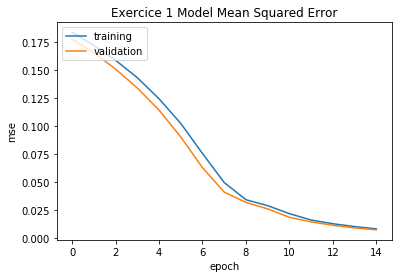

In [0]:
plot_metrics(pipeline=pipeline, exercice_number=exercice_number)

Executing op __inference__defun_call_1562783 in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op __inference__defun_call_1562789 in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op __inference__defun_call_1562798 in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op __inference__defun_call_1562805 in device /job:localhost/replica:0/task:0/device:XLA_GPU:0
Executing op __inference__defun_call_1562813 in device /job:localhost/replica:0/task:0/device:XLA_GPU:0


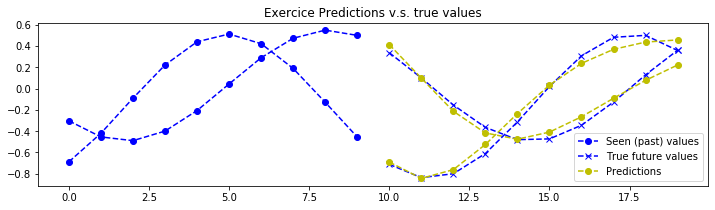

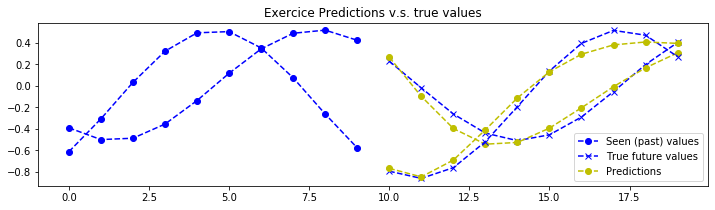

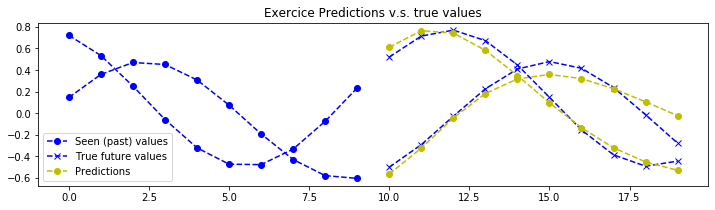

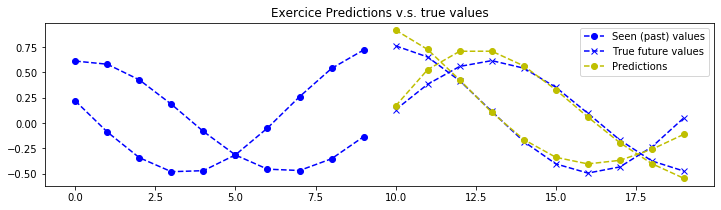

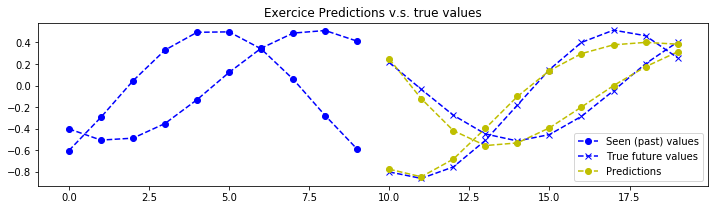

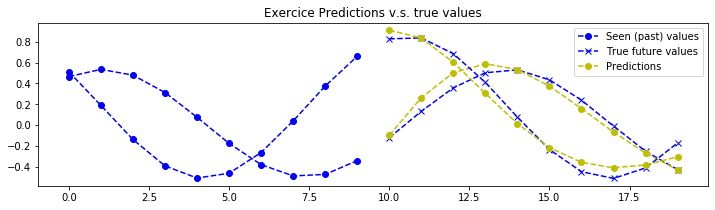

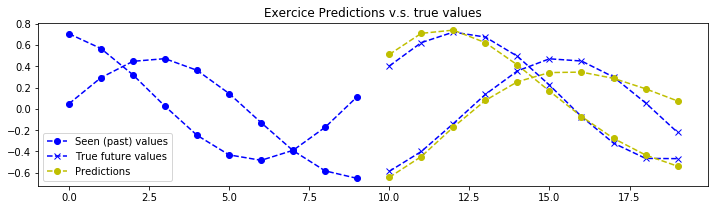

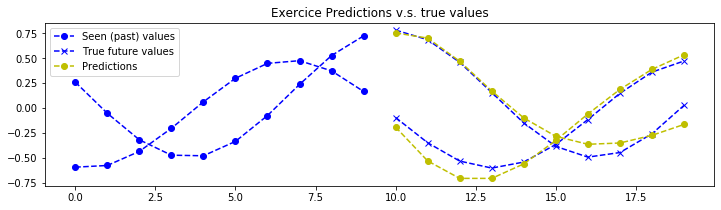

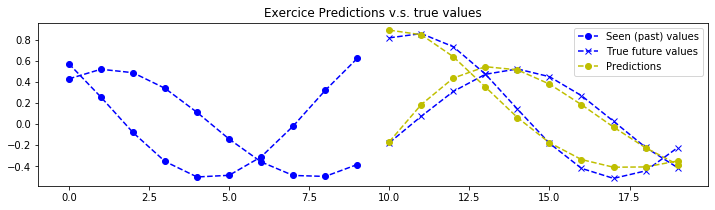

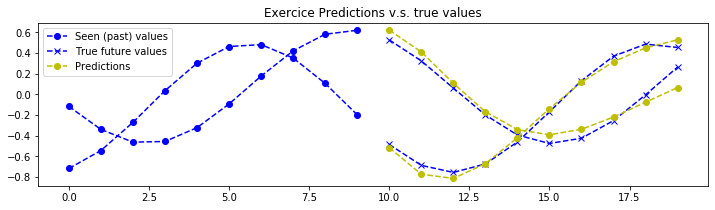

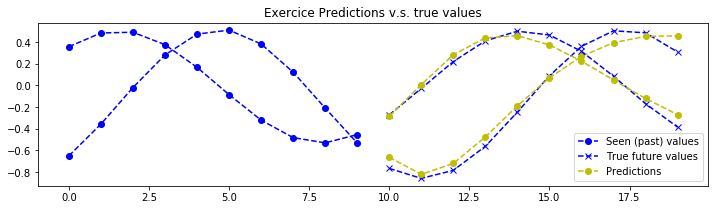

In [0]:
def plot_predictions(data_inputs, expected_outputs, pipeline, max_plotted_predictions):
    _, _, data_inputs_validation, expected_outputs_validation = \
        pipeline.get_step_by_name('ValidationSplitWrapper').split(data_inputs, expected_outputs)

    pipeline.apply('toggle_plotting')
    pipeline.apply('set_max_plotted_predictions', max_plotted_predictions)

    signal_prediction_pipeline = pipeline.get_step_by_name('SignalPrediction')
    signal_prediction_pipeline.transform_data_container(DataContainer(
        data_inputs=data_inputs_validation,
        expected_outputs=expected_outputs_validation
    ))

plot_predictions(data_inputs, expected_outputs, pipeline, max_plotted_validation_predictions)

## Conclusion 

Recurrent Neural Networks are fabulous. They can learn to predict complex things. They can read multiple features from sequence data, and output variable length sequences of the same features, or of totally different features. Some people even use RNNs combined with other neural network architectures, such as CNNs, for automatic image captioning (CNN encoder for images, RNN decoder for the description). 

Here is what you learned:
- Building a time series machine learning pipeline
- Building a TensorFlow v2 encoder decoder sequence to sequence model
- Building a clean machine learning pipeline using Neuraxle
- Properly split the data for training and validation
- Shuffling the data during training
- Using minibatches to process the data using a MiniBatchSequentialPipeline


## About Us

The Author, [Guillaume Chevalier](https://guillaume-chevalier.com/):
- https://ca.linkedin.com/in/chevalierg
- https://twitter.com/guillaume_che
- https://github.com/guillaume-chevalier/

This original project was updated and maintained with the support of our team, contributors and business partners at [Neuraxio](https://www.neuraxio.com/en/):
- https://ca.linkedin.com/company/neuraxio
- https://twitter.com/neuraxio_inc
- https://github.com/Neuraxio/

## License & Citation

This project is free to use according to the [Apache 2.0 License](https://github.com/guillaume-chevalier/seq2seq-signal-prediction/blob/master/LICENSE) as long as you link to the project (citation), and that you respect the License (read the License for more details). You can cite by pointing to the following link: 
- https://github.com/guillaume-chevalier/seq2seq-signal-prediction
